# Smart Building System Dataset
Analysis & Data transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import re

### Analyze data of a single room

In [2]:
base_path = './data/SmartBuildingSystem/KETI/413/'

df_co2 = pd.read_csv(os.path.join(base_path, 'co2.csv'), names=['timestamp', 'co2'], sep=',')
df_co2.head()

,timestamp,co2
0,1377299107,488.0
1,1377299108,495.0
2,1377299110,487.0
3,1377299127,496.0
4,1377299130,495.0


In [3]:
df_hum = pd.read_csv(os.path.join(base_path, 'humidity.csv'), names=['timestamp', 'humidity'], sep=',')
df_hum.head()

,timestamp,humidity
0,1377299107,45.34
1,1377299108,45.34
2,1377299126,45.34
3,1377299131,45.31
4,1377299136,45.34


In [ ]:
df_light = pd.read_csv(os.path.join(base_path, 'light.csv'), names=['timestamp', 'light'], sep=',')
print(df_light.head())

df_pir = pd.read_csv(os.path.join(base_path, 'pir.csv'), names=['timestamp', 'pir'], sep=',')
print(df_pir.head())

df_temp = pd.read_csv(os.path.join(base_path, 'temperature.csv'), names=['timestamp', 'temperature'], sep=',')
print(df_temp.head())

### Importing, transform and export data from Smart Building System

In [4]:
# Applying resampling on the given dataframe
def resample_data(dataframe, col_name, timestamp_name):
    dataframe[timestamp_name] = pd.to_datetime(dataframe[timestamp_name], unit='s')

    aggregates = {
        col_name: 'mean'
    }

    return dataframe.resample('60S', on=timestamp_name).agg(aggregates)

# Return from each room directory a complete dataframe of all the separated features/columns
def transform_room_data(path):
    columns = ['co2', 'humidity', 'light', 'pir', 'temperature']
    df = pd.DataFrame()

    for col_name in columns:
        filename = os.path.join(path, col_name + '.csv')

        df_feature = pd.read_csv(filename, names=['timestamp', col_name], sep=',')

        df_sampled = resample_data(df_feature, col_name, 'timestamp')

        if (columns.index(col_name) < 1):
            df = df_sampled
        else:
            df[col_name] = df_sampled[col_name]
    
    df.dropna(subset=columns, inplace=True)

    return df

# Import, transform and export all data from KETI
def import_data(base_path='../../data/SmartBuildingSystem/KETI/*'):
    all_room_dirs = glob.glob(base_path)

    pattern = re.compile('^[0-9]+$')

    all_room_dirs = [f for f in all_room_dirs if pattern.match(f[-3:])]

    for room_dir in all_room_dirs:
        df = transform_room_data(room_dir)

        output_path = '../../data/SmartBuildingSystem/data/' + room_dir[-3:] + '.csv'

        df.to_csv(output_path)

Apply all transformations and export

In [6]:
import_data()

### Analysis of a single converted room

In [2]:
dfe = pd.read_csv('data/transformed_data/413.csv')

In [3]:
dfe.head()

,timestamp,co2,humidity,light,pir,temperature
0,2013-08-23 23:05:00,494.727273,45.3300,96.555556,0.0,23.927778
1,2013-08-23 23:06:00,496.666667,45.3275,96.833333,0.0,23.938333
2,2013-08-23 23:07:00,498.916667,45.3250,97.333333,0.0,23.942500
3,2013-08-23 23:08:00,504.166667,45.3125,97.083333,0.0,23.952500
4,2013-08-23 23:09:00,499.500000,45.3100,97.416667,0.0,23.955833


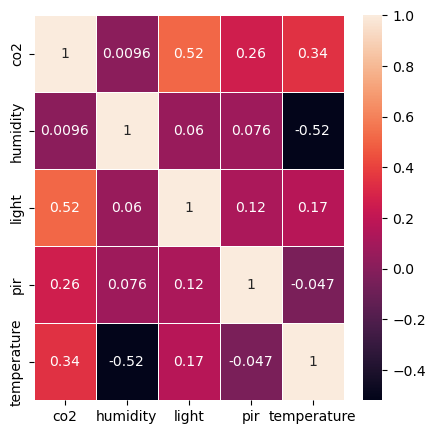

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dfe.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

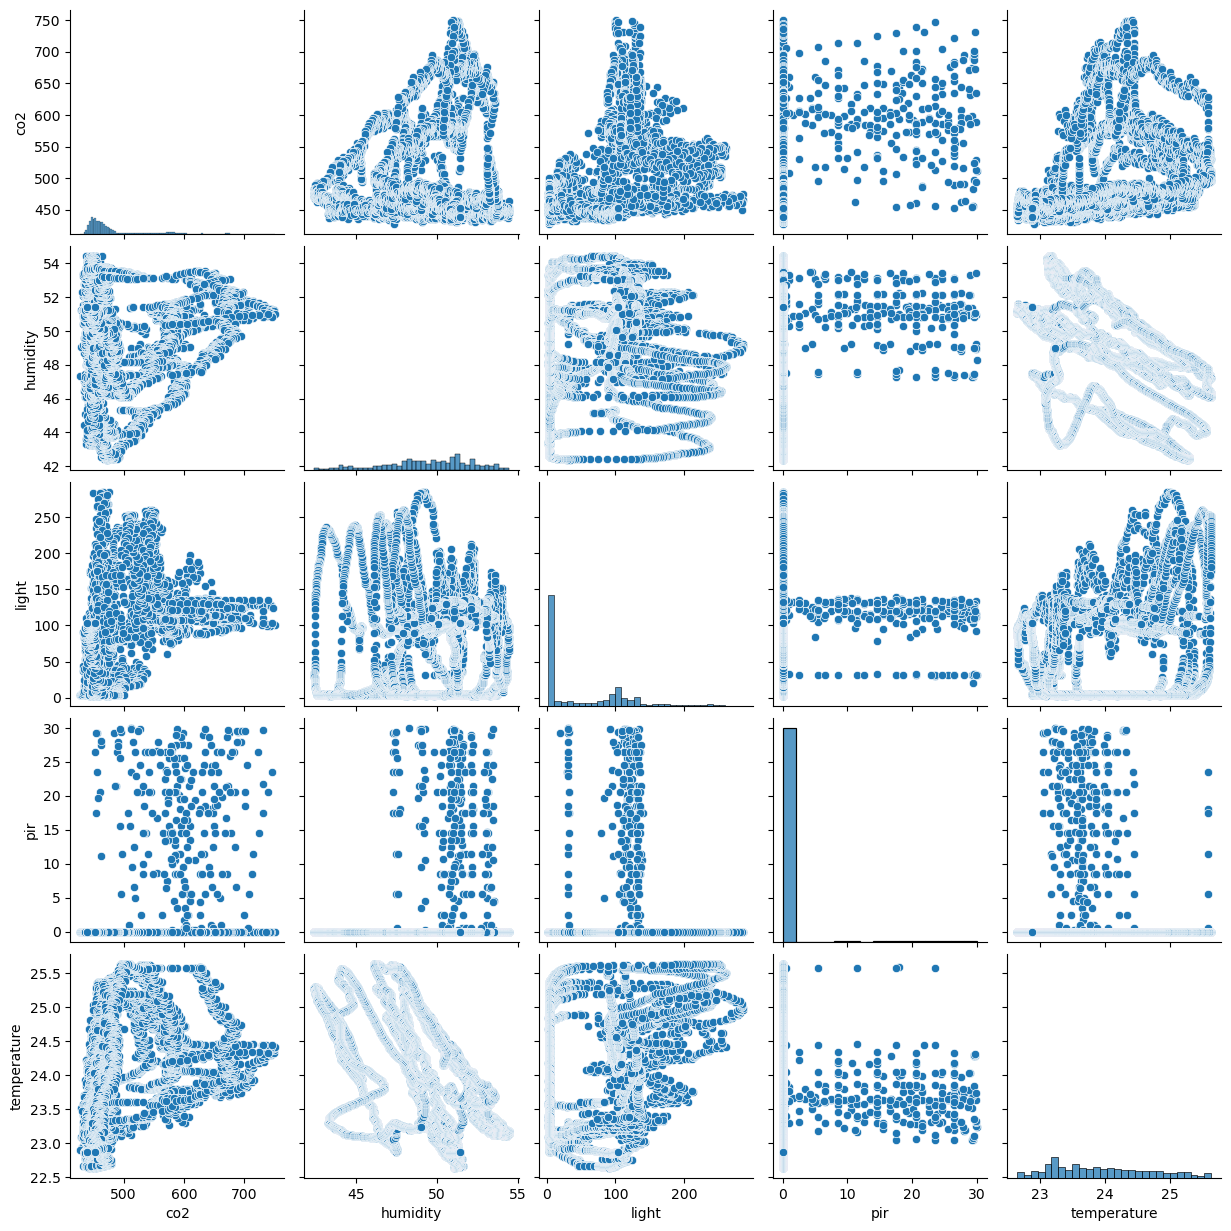

In [7]:
sns.pairplot(dfe)
plt.show()